# Power and Corruption - Ubeda & Dueñez, 2010

Se implementa un sistema de ecuaciones diferenciales que modela la evolución de las proporciones de las cuatro estrategias en el "Juego de la Corrupción". 
Estas ecuaciones están basadas en la dinámica del replicador, una herramienta común en la teoría de juegos evolutiva.

La idea central es que las estrategias que obtienen un pago mejor que el promedio aumentarán su proporción en la población, mientras que las estrategias con un rendimiento por debajo del promedio disminuirán.

In [ ]:
#Se intalan las librerias necesarias
%pip install numpy
%pip iSí. Hola Hola. Ah Ajá Ajá Ah Hola Re Hola Hola Hola Sí. Hola nstall mathplotlib
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mathplotlib (from versions: none)
ERROR: No matching distribution found for mathplotlib


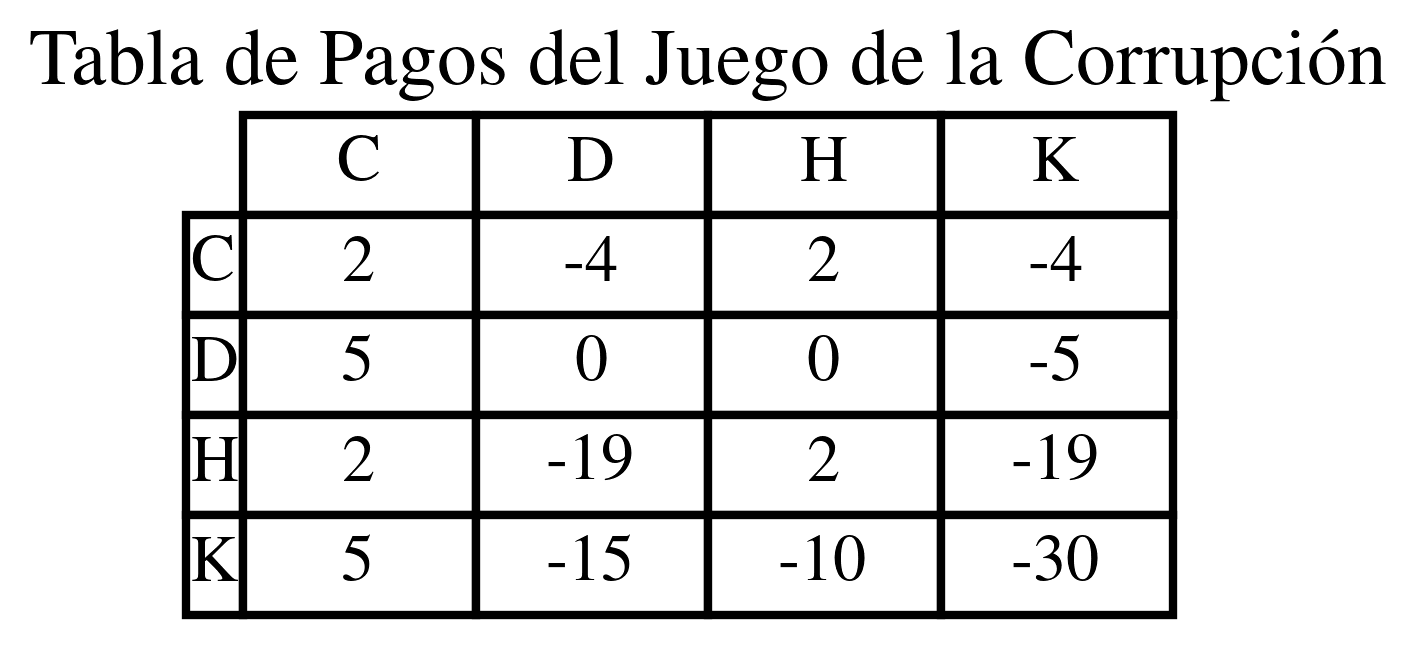

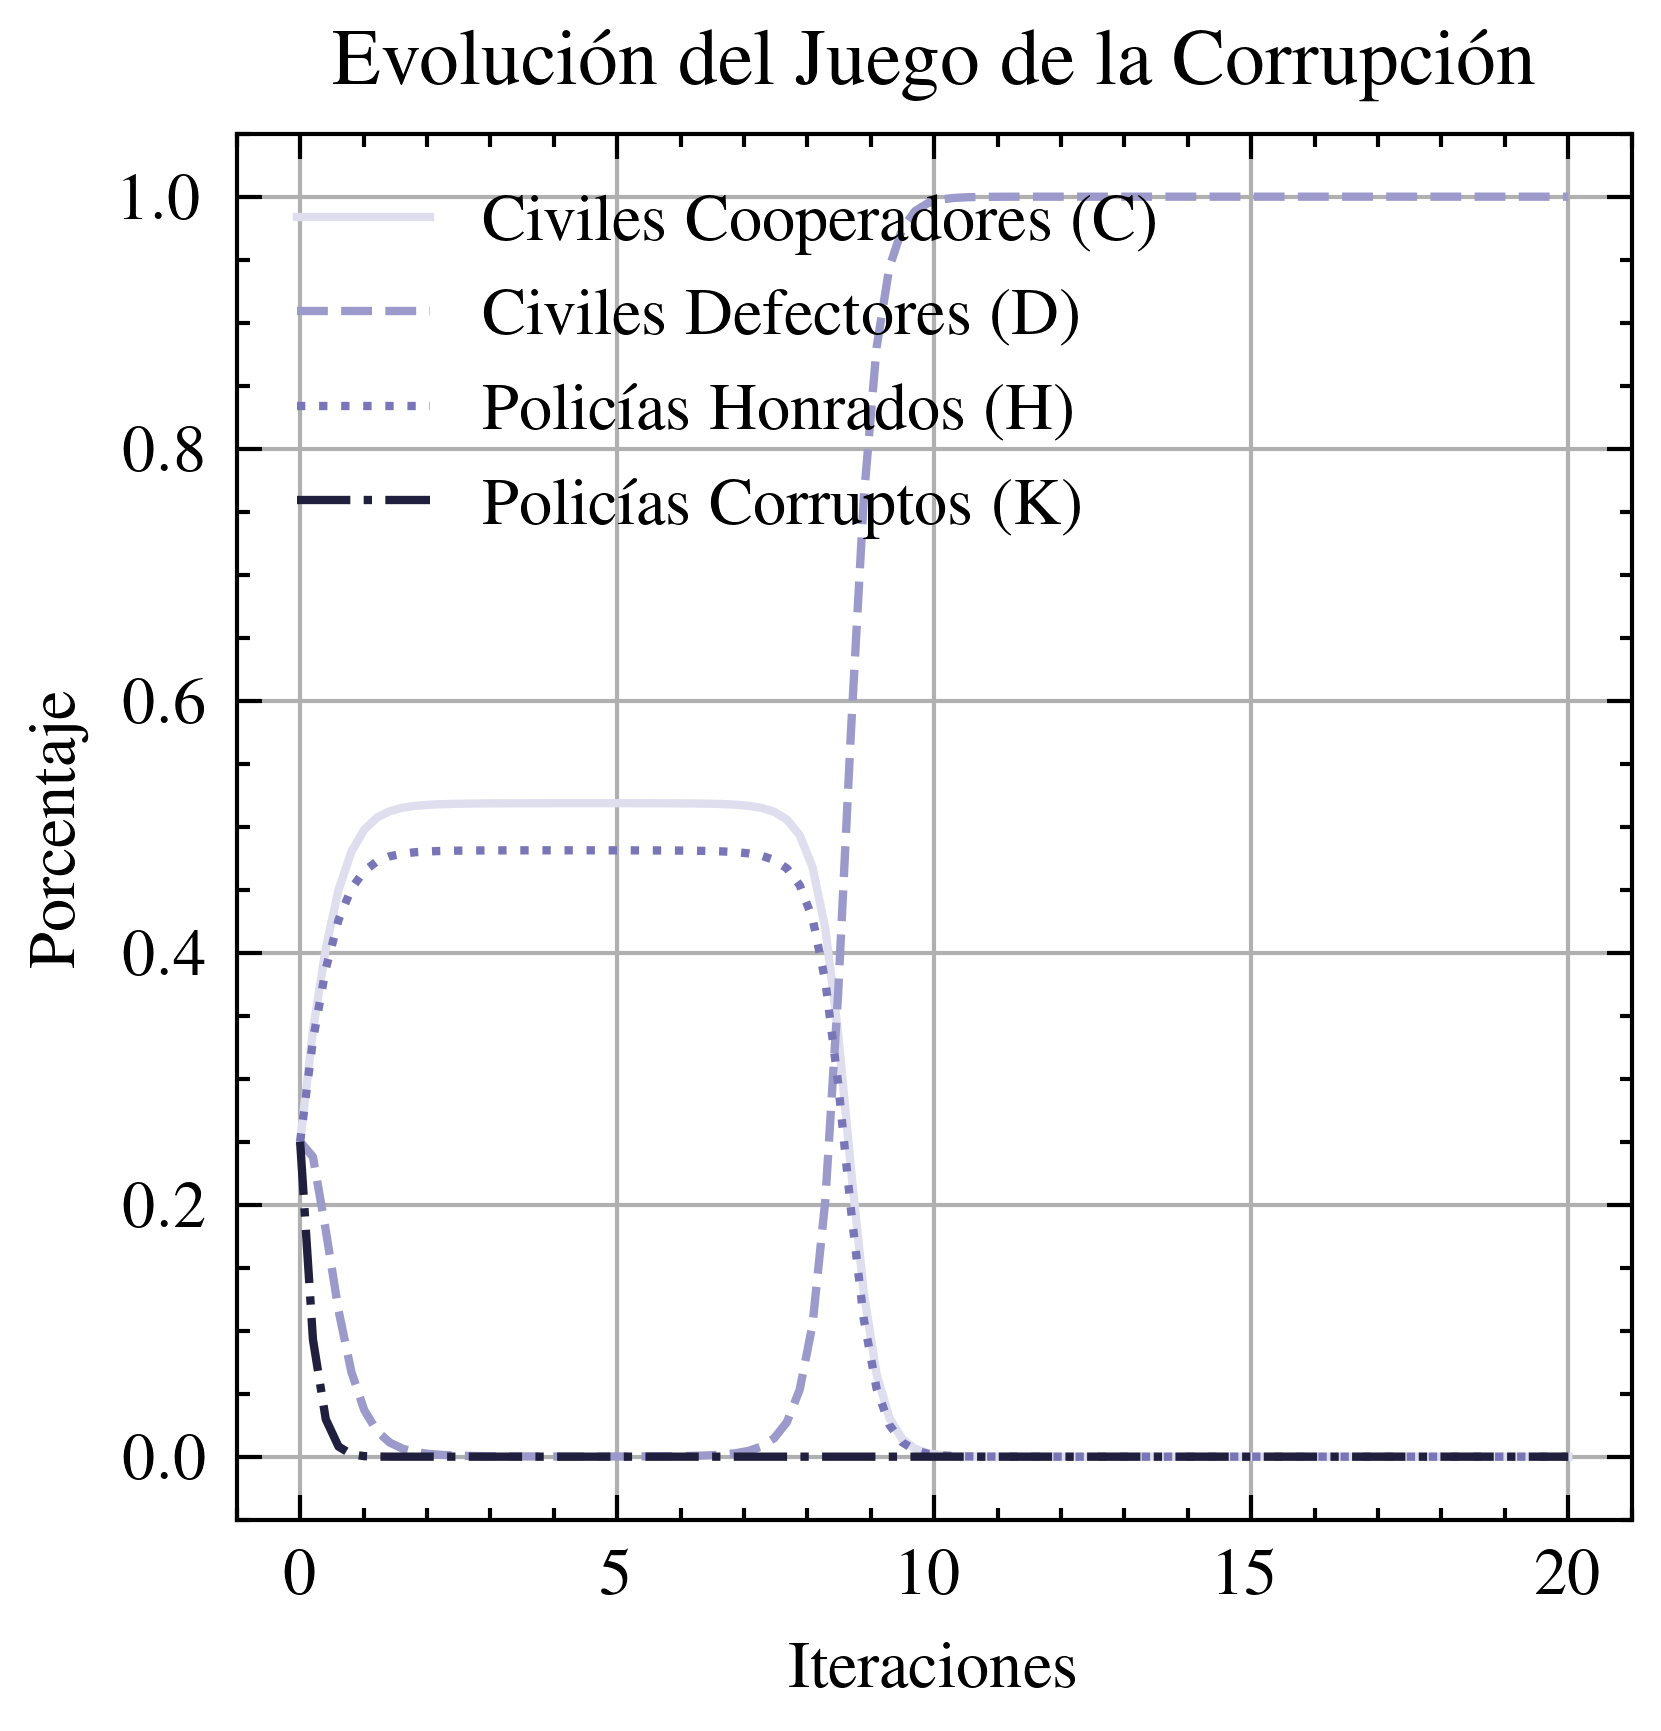

In [ ]:
#Se crea el modelo del juego de la corrupción por medio de ecuaciones diferenciales
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scienceplots
import matplotlib.patches as patches

plt.style.use(('science', 'ieee'))

# Parámetros del juego (se ajustan)
r = 2   # Recompensa por cooperación mutua
s = 4   # Pérdida por ser cooperador cuando el otro es no coopera
t = 5   # Ganancia por ser no cooperador cuando el otro es cooperador
p = 5  # Castigo para civiles que desertan
q = 15   # Castigo para policías que desertan
c = 15  # Costo para policías de castigar a civiles
d = 15  # Costo para policías de castigar a policías


# Función para verificar las desigualdades
def check_inequalities(r, s, t, p, q, c, d):
    """
    Verifica que se cumplen las desigualdades del modelo.

    Args:
        r, s, t, p, q, c, d: Parámetros del modelo.
    
    Returns:
        bool: True si todas las desigualdades se cumplen, False si no.
    """
    if not (t > r > t - s):
        print("Error: No se cumple t > r > t - s")
        return False
    if not (t - s > 0):
        print("Error: No se cumple t - s > 0")
        return False
    if not (p > 0):
        print("Error: No se cumple p > 0")
        return False
    if not (c > 0):
        print("Error: No se cumple c > 0")
        return False
    if not (q > 0):
        print("Error: No se cumple q > 0")
        return False
    if not (d > 0):
        print("Error: No se cumple d > 0")
        return False
    return True


# Ecuaciones diferenciales para el modelo del Juego de la Corrupción
def corruption_game_equations(x, t):
    """
    Define las ecuaciones diferenciales del juego de la corrupción.

    Args:
        x (list): Lista con las proporciones de cada estrategia [c, d, h, k].
        t (float): Tiempo actual (no se usa directamente, pero requerido por odeint).

    Returns:
        list: Lista de las derivadas temporales de las proporciones [dc/dt, dd/dt, dh/dt, dk/dt].
    """

    c, d, h, k = x  # Desempaqueta las proporciones de las estrategias.
    
    # Matriz de pagos del juego de la corrupción (ver el artículo).
    payoff_matrix = np.array([
    [r,   -s,  r,  -s],
    [t,    0, t-p, -p],
    [r, -s-c, r, -s-d],
    [t,  -c, t-q, -q-d]
    ])

    # Vector de las proporciones de las estrategias. (Todas son iguales con 25% al inicio)
    strategy_vector = np.array([c, d, h, k])

    # Calcula los pagos medios para cada estrategia. Multiplicando la matriz de pagos por el vector de proporciones.
    mean_payoffs = payoff_matrix @ strategy_vector

    # Calcula el pago medio de toda la población.
    population_mean_payoff = np.dot(strategy_vector, mean_payoffs)

    # Calcula las derivadas de cada proporción.
    dc_dt = c * (mean_payoffs[0] - population_mean_payoff)
    dd_dt = d * (mean_payoffs[1] - population_mean_payoff)
    dh_dt = h * (mean_payoffs[2] - population_mean_payoff)
    dk_dt = k * (mean_payoffs[3] - population_mean_payoff)
    
    return [dc_dt, dd_dt, dh_dt, dk_dt]

def simulate_corruption_game(initial_conditions, time_points):
    """
    Simula el juego de la corrupción.

    Args:
        initial_conditions (list): Proporciones iniciales de cada estrategia.
        time_points (array): Tiempo en que se simula el juego.
    
    Returns:
        array: Matriz con la evolución de las proporciones de cada estrategia con el tiempo.
    """

    # Simula el juego usando las ecuaciones diferenciales.
    results = odeint(corruption_game_equations, initial_conditions, time_points)
    
    return results
    
def plot_results(results, time_points):
  """
    Genera un gráfico de las estrategias a lo largo del tiempo.

    Args:
        results (array): Matriz de la evolución de las proporciones de cada estrategia.
        time_points (array): Vector con los tiempos de la simulación.
  """
  c_results = results[:, 0]
  d_results = results[:, 1]
  h_results = results[:, 2]
  k_results = results[:, 3]
  
  
  plt.figure(figsize=(3, 3))
  
  
  # Define los colores para cada línea
  colors = ['#DEDEEE', '#9B9ACA', '#7976B8', '#201F3D']

  plt.plot(time_points, c_results, label='Civiles Cooperadores (C)', color=colors[0])
  plt.plot(time_points, d_results, label='Civiles Defectores (D)', color=colors[1])
  plt.plot(time_points, h_results, label='Policías Honrados (H)', color=colors[2])
  plt.plot(time_points, k_results, label='Policías Corruptos (K)', color=colors[3])

  plt.xlabel('Iteraciones')
  plt.ylabel('Porcentaje')
  plt.title('Evolución del Juego de la Corrupción')
  plt.legend()
  plt.grid(True)
  plt.savefig('juegoDeLaCorrupcion.png', dpi=300)
  plt.show()

def plot_payoff_table(r, s, t, p, q, c, d):
        """
        Grafica la tabla de pagos del juego de la corrupción.

        Args:
            r, s, t, p, q, c, d: Parámetros del juego.
        """

        payoff_matrix = np.array([
        [r, -s, r, -s],
        [t, 0, t - p, -p],
        [r, -s - c, r, -s - d],
        [t, -c, t - q, -q - d]
    ])
        
        fig, ax = plt.subplots(figsize=(2, 1))
        ax.axis('off')  # Ocultar ejes
        
        # Nombres de las estrategias
        strategies = [' C ', ' D ', ' H ', ' K ']
        
        # Colores para resaltar los cuadrantes
        colors = ['lavender', 'midnightblue']
        
        # Dibuja la tabla
        table = ax.table(cellText=payoff_matrix, 
                        colLabels=strategies,
                        rowLabels=strategies,
                        cellLoc='center', 
                        loc='center', 
                        fontsize=12)
        table.auto_set_font_size(True)
        #table.set_fontsize(12)

        

        plt.title('Tabla de Pagos del Juego de la Corrupción')
        plt.savefig('tablaPagos.png', dpi=300) # Guarda la tabla como imagen
        plt.show()

# Condiciones iniciales
initial_conditions = [0.25, 0.25, 0.25, 0.25] # 25% para cada estrategia
time_points = np.linspace(0, 20, 100)

# Verificar las desigualdades antes de simular
if check_inequalities(r, s, t, p, q, c, d):
    # Simula el juego
    results = simulate_corruption_game(initial_conditions, time_points)
    # Grafica la tabla de pagos
    plot_payoff_table(r, s, t, p, q, c, d)
    
    # Grafica los resultados
    plot_results(results, time_points)
    
else:
    print("Error: Los parámetros no cumplen las desigualdades. La simulación no se ejecutará.")

# Programa para limpiar la caché
Antes de trabajar con las simulaciones de las distintas sociedades se crea un pequeño programa para limpiar la caché de mathplotlib, ocurre cuando existen errores al graficar o la computadora se apaga repentinamente, lo cual ocasiona un error al graficar.

In [2]:
#Pequeño programa para limpiar la caché de matplotlib, 
# sucede cuando hay archivos curruptos debido a un reinicio inesperado de la computadora

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import shutil
import os

# Limpiar la caché de matplotlib
cache_dir = mpl.get_cachedir()
tex_cache_dir = os.path.join(cache_dir, 'tex.cache')
if os.path.exists(tex_cache_dir):
    shutil.rmtree(tex_cache_dir)
    print(f"Caché de tex eliminada: {tex_cache_dir}")
else:
    print(f"No se encontró la caché de tex: {tex_cache_dir}")


ModuleNotFoundError: No module named 'matplotlib'

Se encapusla el código en una función para poder llamarla desde el script principal.

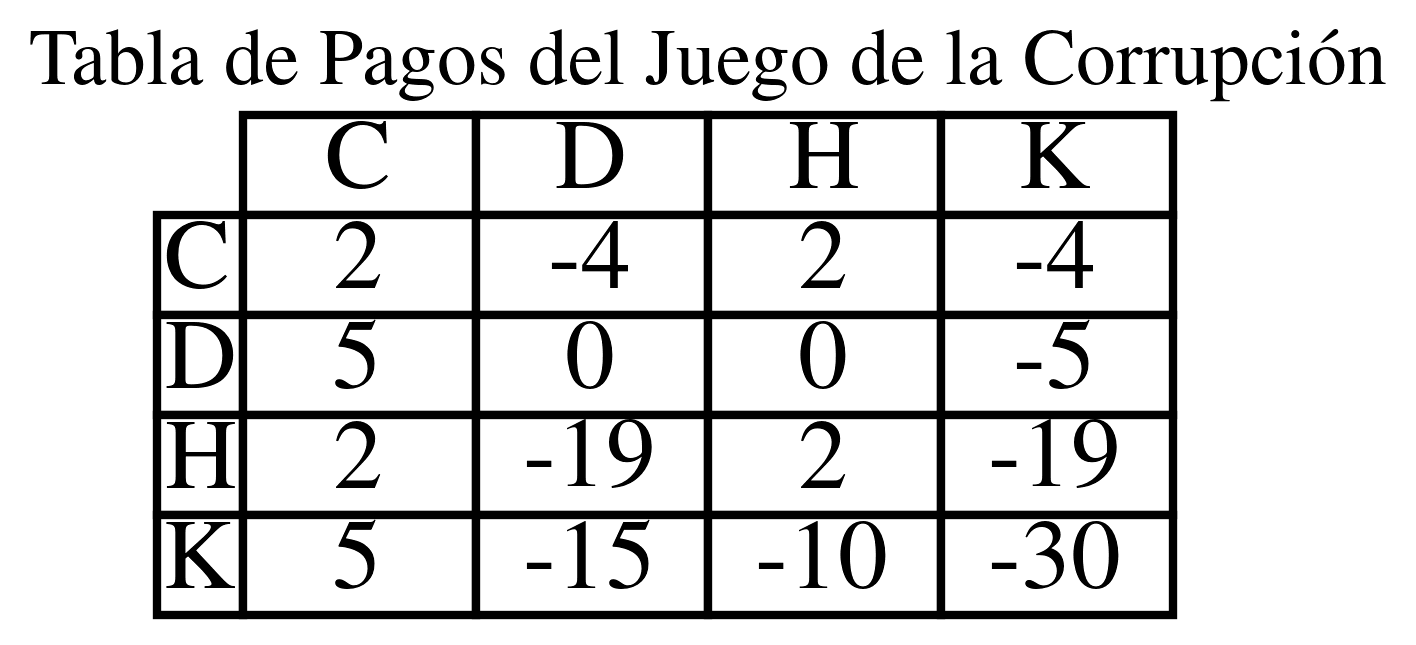


Tabla de Pagos (Valores Numéricos):

    C     D     H     K    
 C     2   -4    2   -4 
 D     5    0    0   -5 
 H     2  -19    2  -19 
 K     5  -15  -10  -30 




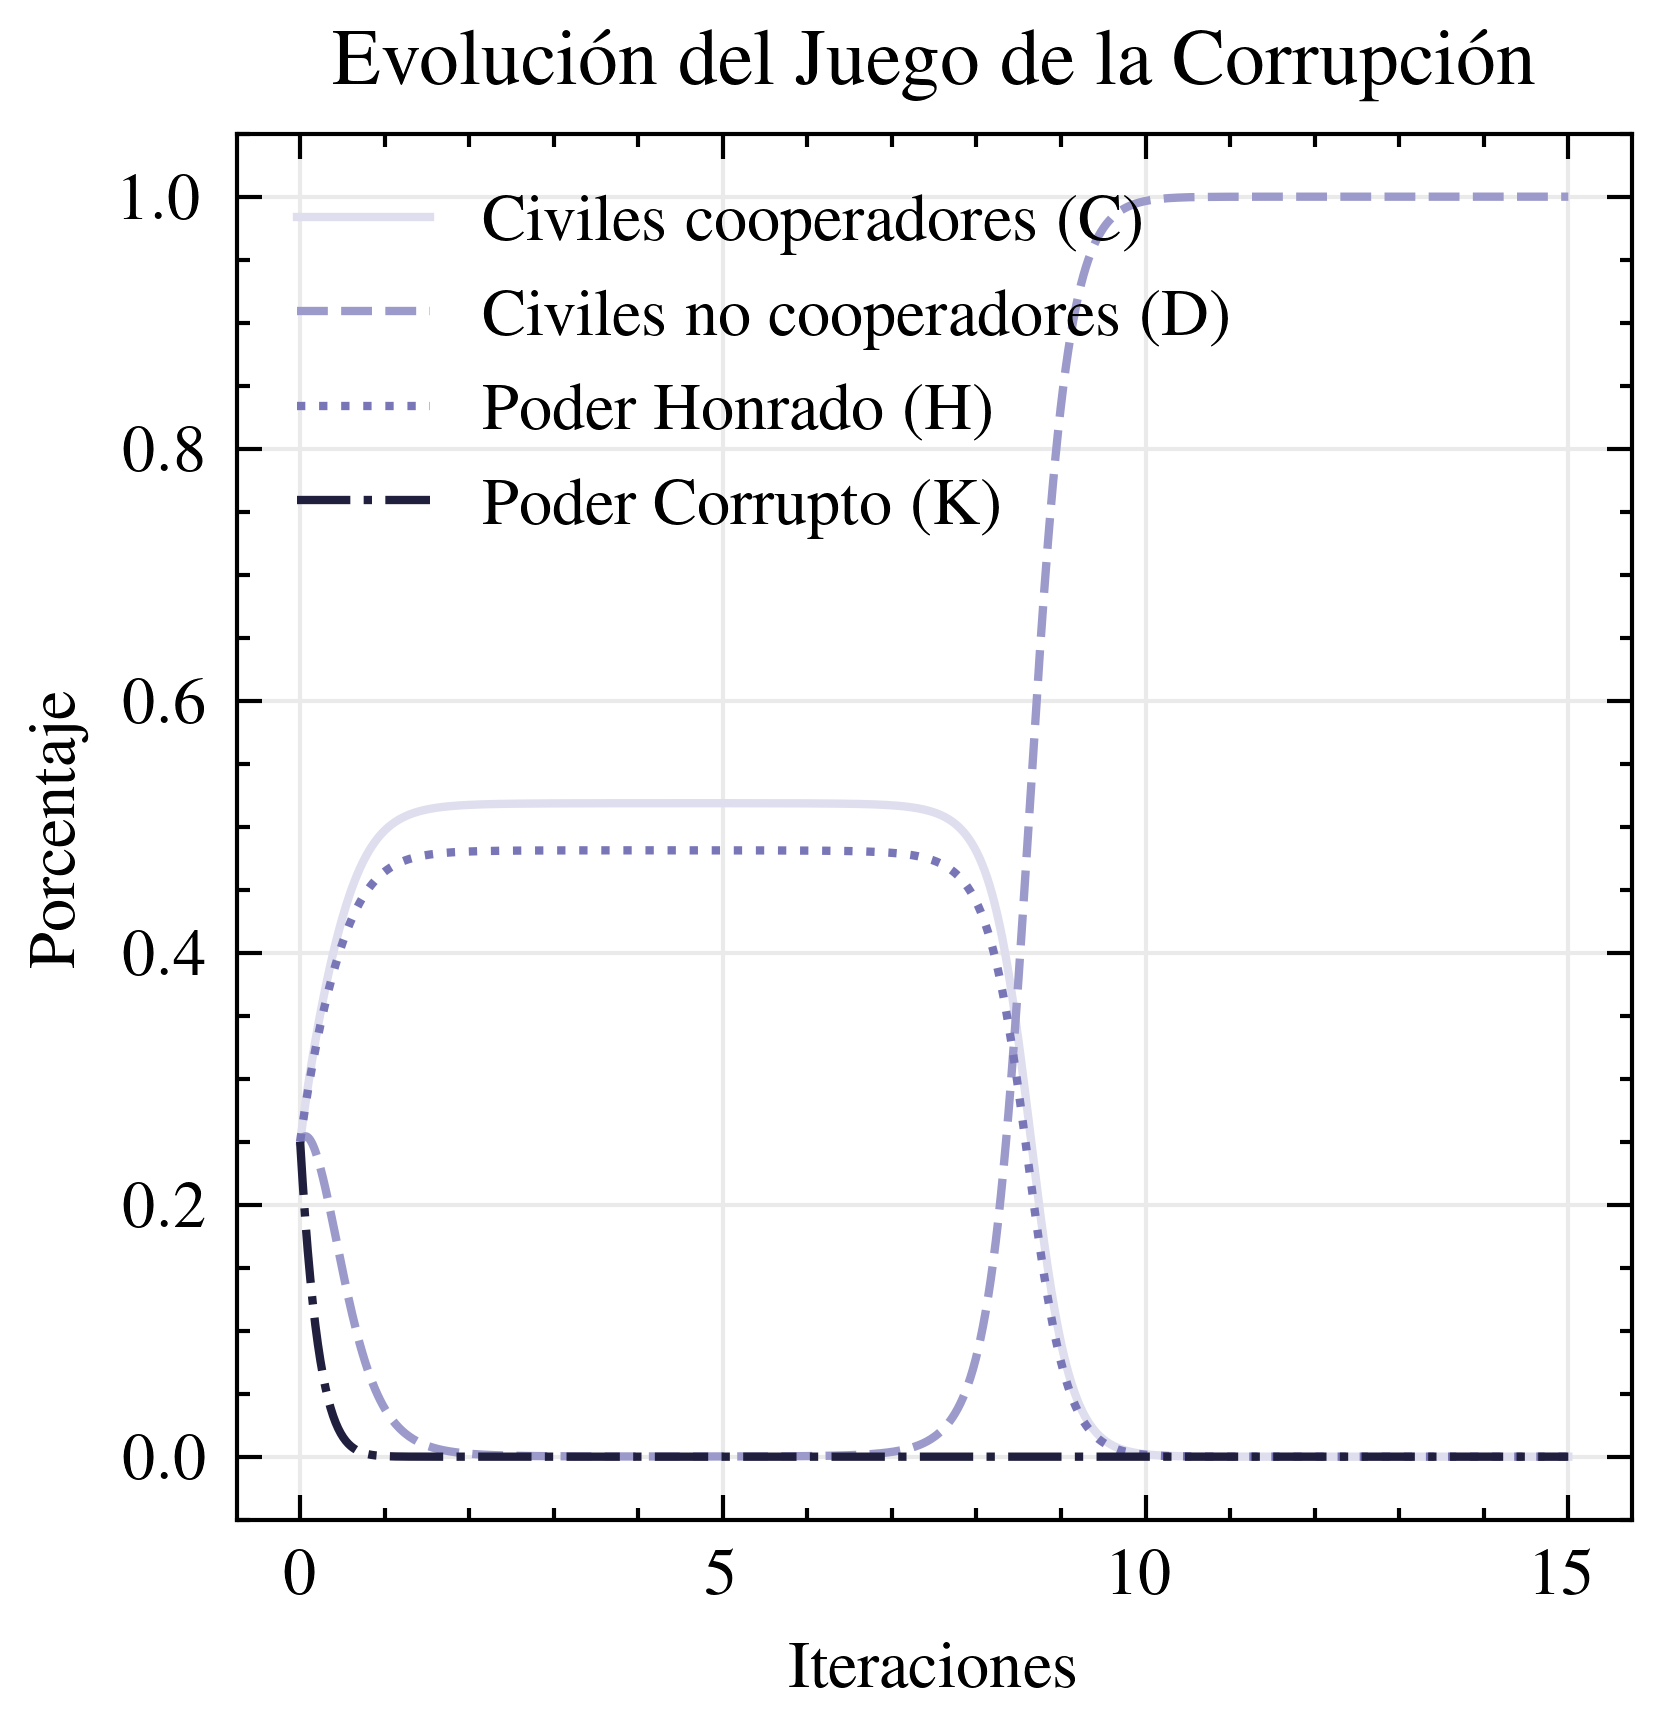

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import scienceplots
import matplotlib.patches as patches
import os

plt.style.use(('science', 'ieee'))

# Función para simular y graficar el juego de la corrupción
def run_corruption_simulation(r, s, t, p, q, c, d, tiempo_inicial, tiempo_final, num_puntos, filename="default"):
    """
    Simula el juego de la corrupción y genera ambas gráficas.

    Args:
        r, s, t, p, q, c, d: Parámetros del juego.
        tiempo_inicial (int): Valor inicial del rango de tiempo.
        tiempo_final (int): Valor final del rango de tiempo.
        num_puntos (int): Cantidad de puntos de tiempo.
        filename (str): Nombre base para los archivos de salida.
    """
    """
    # Función para verificar las desigualdades
    #Se desactivó porque en los resultados de los investigadores usaron parametros para el juego del dilema del prisionero que no cumplian estas desigualdades
    
    def check_inequalities(r, s, t, p, q, c, d):
        if not (t > r > t - s):
            print("Error: No se cumple t > r > t - s")
            return False
        if not (t - s > 0):
            print("Error: No se cumple t - s > 0")
            return False
        if not (p > 0):
            print("Error: No se cumple p > 0")
            return False
        if not (c > 0):
            print("Error: No se cumple c > 0")
            return False
        if not (q > 0):
            print("Error: No se cumple q > 0")
            return False
        if not (d > 0):
            print("Error: No se cumple d > 0")
            return False
        return True
    """
    # Ecuaciones diferenciales para el modelo del Juego de la Corrupción
    def corruption_game_equations(x, t):
        c, d, h, k = x
        payoff_matrix = np.array([
            [r,   -s,  r,  -s],
            [t,    0, t-p, -p],
            [r, -s-c, r, -s-d],
            [t,  -c, t-q, -q-d]
        ])
        strategy_vector = np.array([c, d, h, k])
        mean_payoffs = payoff_matrix @ strategy_vector
        population_mean_payoff = np.dot(strategy_vector, mean_payoffs)
        dc_dt = c * (mean_payoffs[0] - population_mean_payoff)
        dd_dt = d * (mean_payoffs[1] - population_mean_payoff)
        dh_dt = h * (mean_payoffs[2] - population_mean_payoff)
        dk_dt = k * (mean_payoffs[3] - population_mean_payoff)
        return [dc_dt, dd_dt, dh_dt, dk_dt]

    def simulate_corruption_game(initial_conditions, time_points):
        results = odeint(corruption_game_equations, initial_conditions, time_points, rtol=1e-8, atol=1e-8)
        return results
      
    def plot_results(results, time_points, filename):
        c_results = results[:, 0]
        d_results = results[:, 1]
        h_results = results[:, 2]
        k_results = results[:, 3]
        
        plt.figure(figsize=(3, 3))
        
        colors = ['#DEDEEE', '#9B9ACA', '#7976B8', '#201F3D']
        plt.plot(time_points, c_results, label='Civiles cooperadores (C)', color=colors[0])
        plt.plot(time_points, d_results, label='Civiles no cooperadores (D)', color=colors[1])
        plt.plot(time_points, h_results, label='Poder Honrado (H)', color=colors[2])
        plt.plot(time_points, k_results, label='Poder Corrupto (K)', color=colors[3])

        plt.xlabel('Iteraciones')
        plt.ylabel('Porcentaje')
        plt.title('Evolución del Juego de la Corrupción')
        plt.legend()
        plt.grid(True, color="#EAEAEA")
        
        # Guardar la gráfica
        #os.makedirs(os.path.dirname(filename), exist_ok=True) # Crear directorio si no existe
        plt.savefig(f'{filename}_juegoDeLaCorrupcion.svg', dpi=300)
        plt.show()

    def plot_payoff_table(r, s, t, p, q, c, d, filename):
        payoff_matrix = np.array([
            [r, -s, r, -s],
            [t, 0, t - p, -p],
            [r, -s - c, r, -s - d],
            [t, -c, t - q, -q - d]
        ])
        
        fig, ax = plt.subplots(figsize=(2, 1))
        ax.axis('off')
        
        strategies = [' C ', ' D ', ' H ', ' K ']
        colors = ['lavender', 'midnightblue']
        
        table = ax.table(cellText=payoff_matrix, 
                          colLabels=strategies,
                          rowLabels=strategies,
                          cellLoc='center', 
                          loc='center', 
                          fontsize=12)
        table.auto_set_font_size(True)
        
        plt.title('Tabla de Pagos del Juego de la Corrupción')
        plt.savefig(f'{filename}_tablaPagos.png', dpi=300)
        plt.show()
      
        # Imprime la tabla de pagos numericamente
        print("\nTabla de Pagos (Valores Numéricos):\n")
        print("   ", end="")
        for strat in strategies:
            print(f"{strat}   ", end="")
        print()

        for i, row in enumerate(payoff_matrix):
            print(strategies[i], end=" ")
            for val in row:
                print(f"{val:>4} ", end="")
            print()
        print("\n")

      

    # Condiciones iniciales
    initial_conditions = [0.25, 0.25, 0.25, 0.25]
    time_points = np.linspace(tiempo_inicial, tiempo_final, num_puntos)
    
    """    
    # Verificar las desigualdades antes de simular
    if check_inequalities(r, s, t, p, q, c, d):
        # Simula el juego
        results = simulate_corruption_game(initial_conditions, time_points)
        # Grafica la tabla de pagos
        plot_payoff_table(r, s, t, p, q, c, d, filename)
        # Grafica los resultados
        plot_results(results, time_points, filename)
    else:
        # Grafica la tabla de pagos
        plot_payoff_table(r, s, t, p, q, c, d, filename)
        print("Error: Los parámetros no cumplen las desigualdades. La simulación no se ejecutará.")
    """
    # Simula el juego
    results = simulate_corruption_game(initial_conditions, time_points)
    # Grafica la tabla de pagos
    plot_payoff_table(r, s, t, p, q, c, d, filename)
    # Grafica los resultados
    plot_results(results, time_points, filename)

# Parámetros del juego (pueden ajustarse)
r = 2  
s = 4  
t = 5  
p = 5  
q = 15 
c = 15 
d = 15 
tiempo_inicial = 0
tiempo_final = 15
num_puntos = 1000
filename = "Ejemplo de prueba"

# Llama a la función para ejecutar la simulación
run_corruption_simulation(r, s, t, p, q, c, d, tiempo_inicial, tiempo_final, num_puntos, filename)

# Modelacion

### Se crean los casos para cada país. 
---
Acorde al artículo *Power and Corruption* de Ubeda et al. existen equilibrios correspondientes a ciertas configuraciones.

# Dinamarca

Un equilibrio de civiles honestos y poder honesto

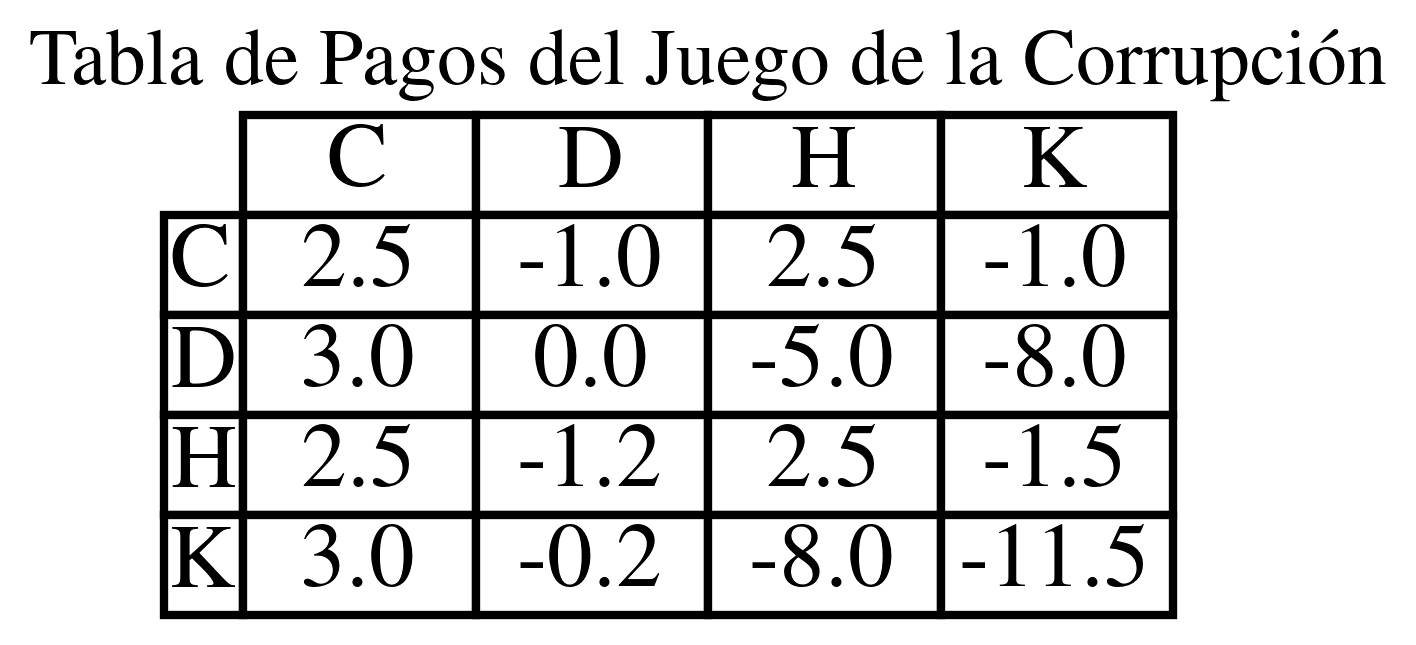


Tabla de Pagos (Valores Numéricos):

    C     D     H     K    
 C   2.5 -1.0  2.5 -1.0 
 D   3.0  0.0 -5.0 -8.0 
 H   2.5 -1.2  2.5 -1.5 
 K   3.0 -0.2 -8.0 -11.5 




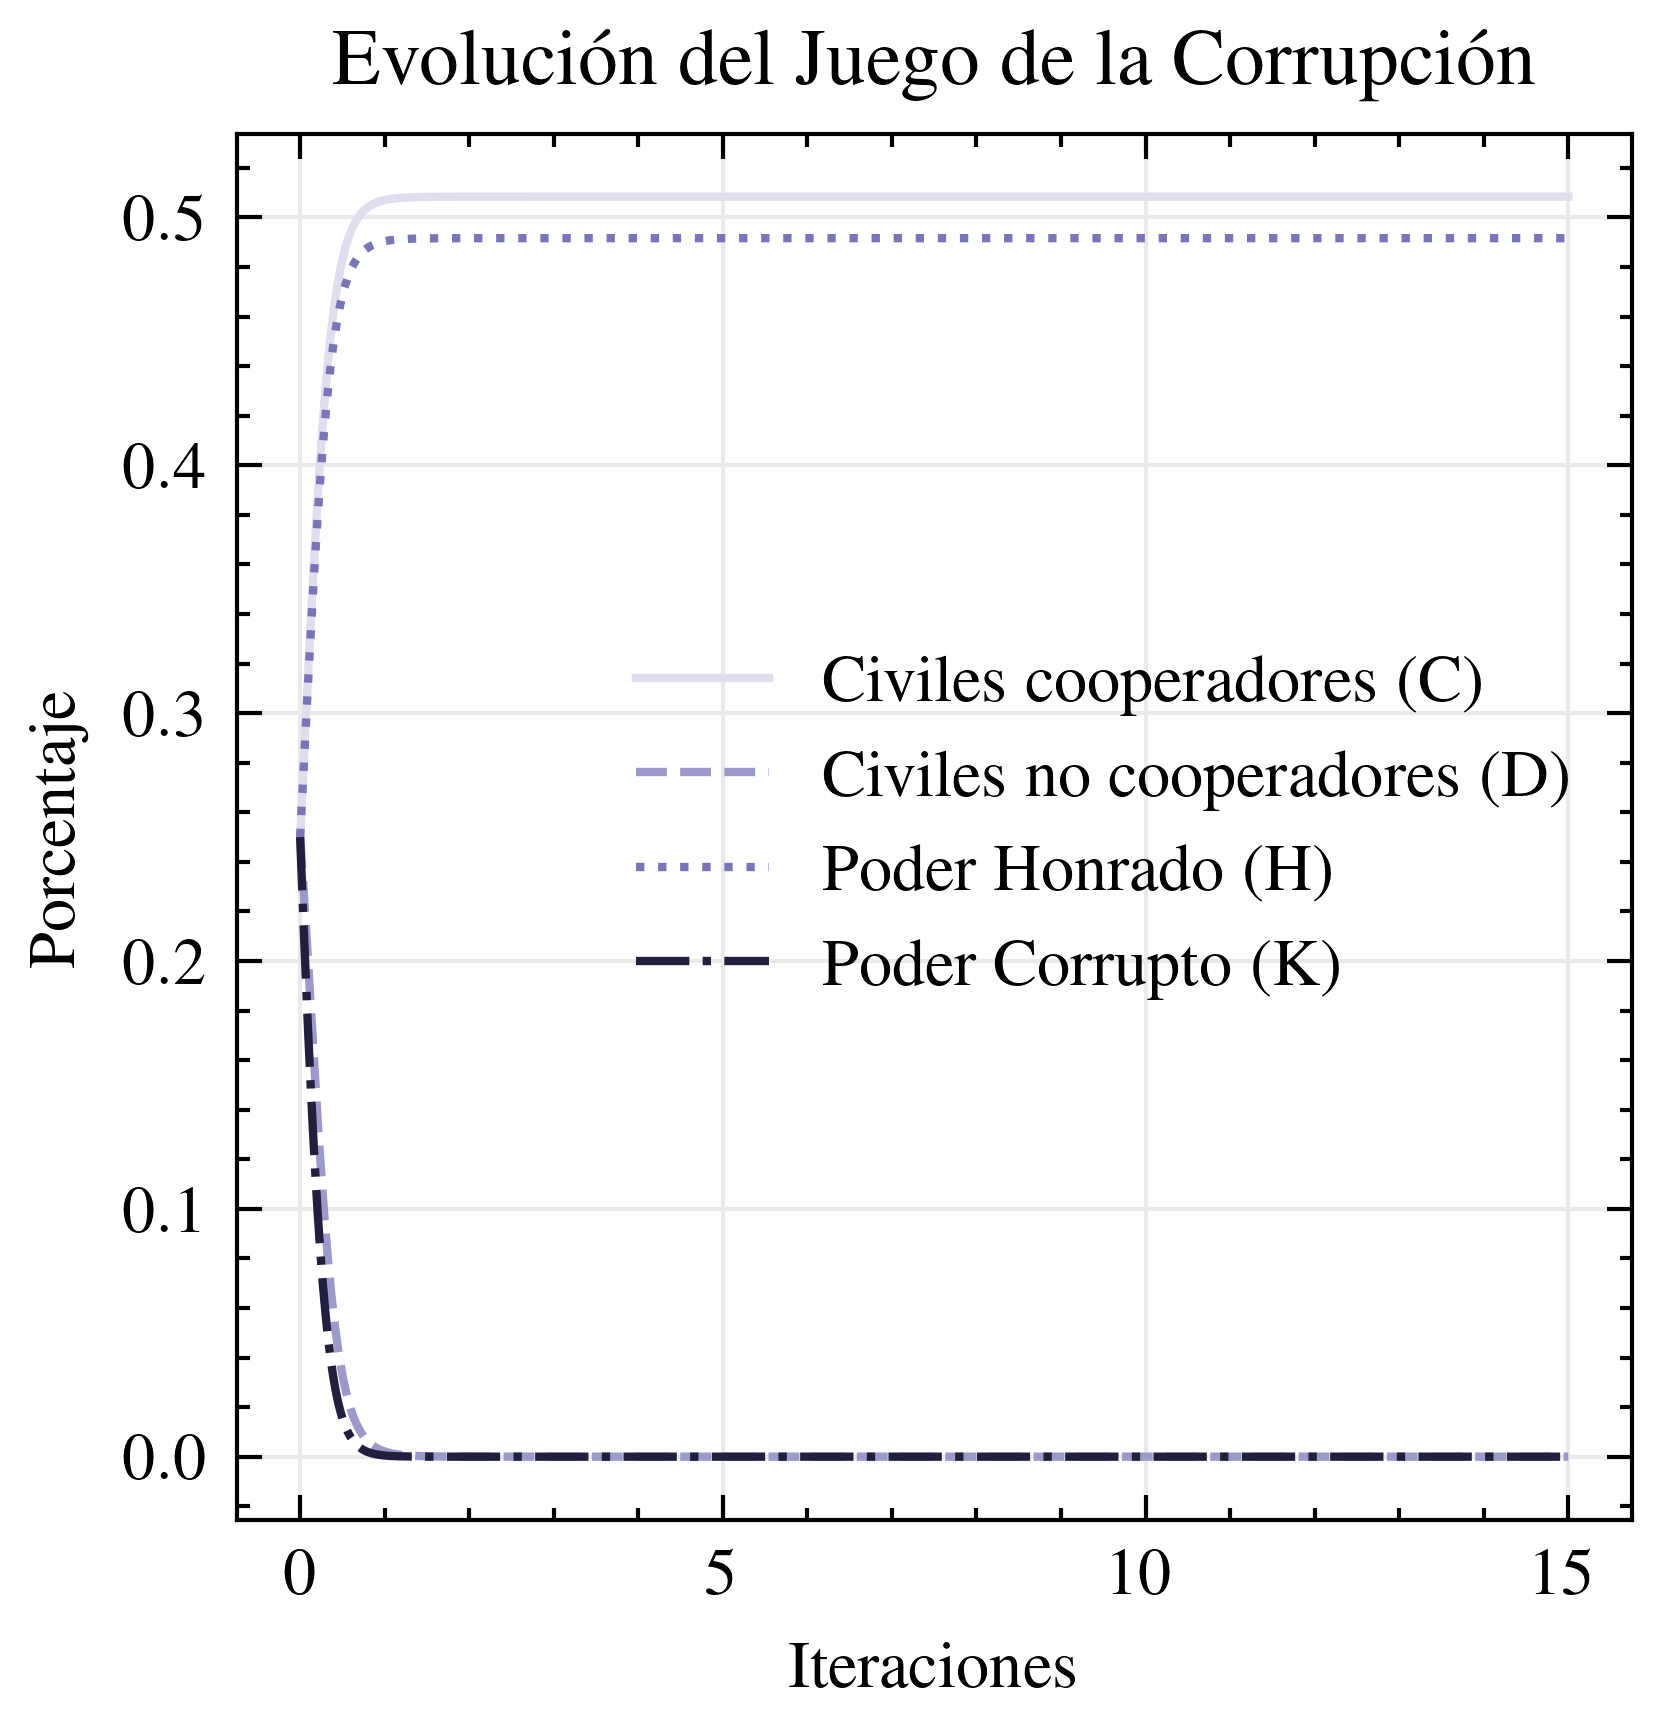

In [7]:
# Parámetros del juego propuesto para Dinamarca

# Pagos del dilema del prisionero
r = 2.5 #Recompensa por cooperación mutua (Covivencia de acuerdo al contrato social)
s = 1 #Pérdida por ser cooperador cuando el otro no coopera (que se aprovechen de ti, sufrir una estafa, robo, etc.)
t = 3 #Ganancia por ser no cooperador cuando el otro es cooperador (aprovecharse del otro, estafar, robar, etc.)

p = 8 #Castigo a los civiles (por ejemplo, cárcel por robo)
#Se ajusta el valor de p para que se cumpla la inecuación s < q + d < p 
#Así se promueve una sociedad más cooperativa y menos corrupta (ver la sección de "Discusión" dentro del artículo de Dueñez et al. 2010)
q = 11 #Castigo a las personas con poder (por ejemplo, cárcel por corrupción)
#Se ajusta el valor de q para que sea mayor que p
#Si p > q entonces la corrupción florece (ver la sección de "Discusión" del artículo de Dueñez et al. 2010)

c = 0.2 #Costo por hacer cumplir las leyes, un buen estado de derecho implican bajos costos.
d = 0.5 #Costo por castigar a alguien con poder (por ejemplo, costo de tiempo y recursos para investigar un caso de corrupción). Una sociedad con un buen sistema anticorrupción tendrá costos muy bajos.

tiempo_inicial = 0
tiempo_final = 15
num_puntos = 1000
filename = "Dinamarca"

# Llama a la función para ejecutar la simulación
run_corruption_simulation(r, s, t, p, q, c, d, tiempo_inicial, tiempo_final, num_puntos, filename)

# Singapur
Aquí existirá un equilibrio entre personas honestas y policías honestos, debido a los altos castigos.

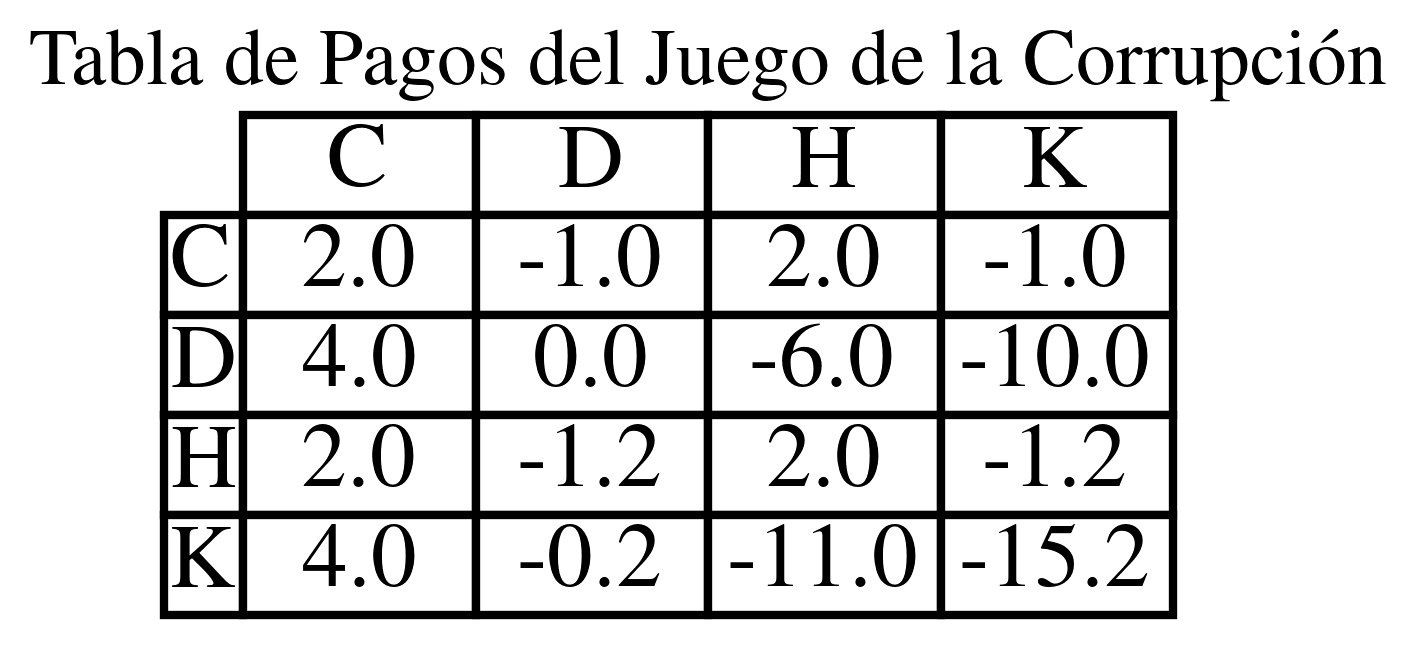


Tabla de Pagos (Valores Numéricos):

    C     D     H     K    
 C   2.0 -1.0  2.0 -1.0 
 D   4.0  0.0 -6.0 -10.0 
 H   2.0 -1.2  2.0 -1.2 
 K   4.0 -0.2 -11.0 -15.2 




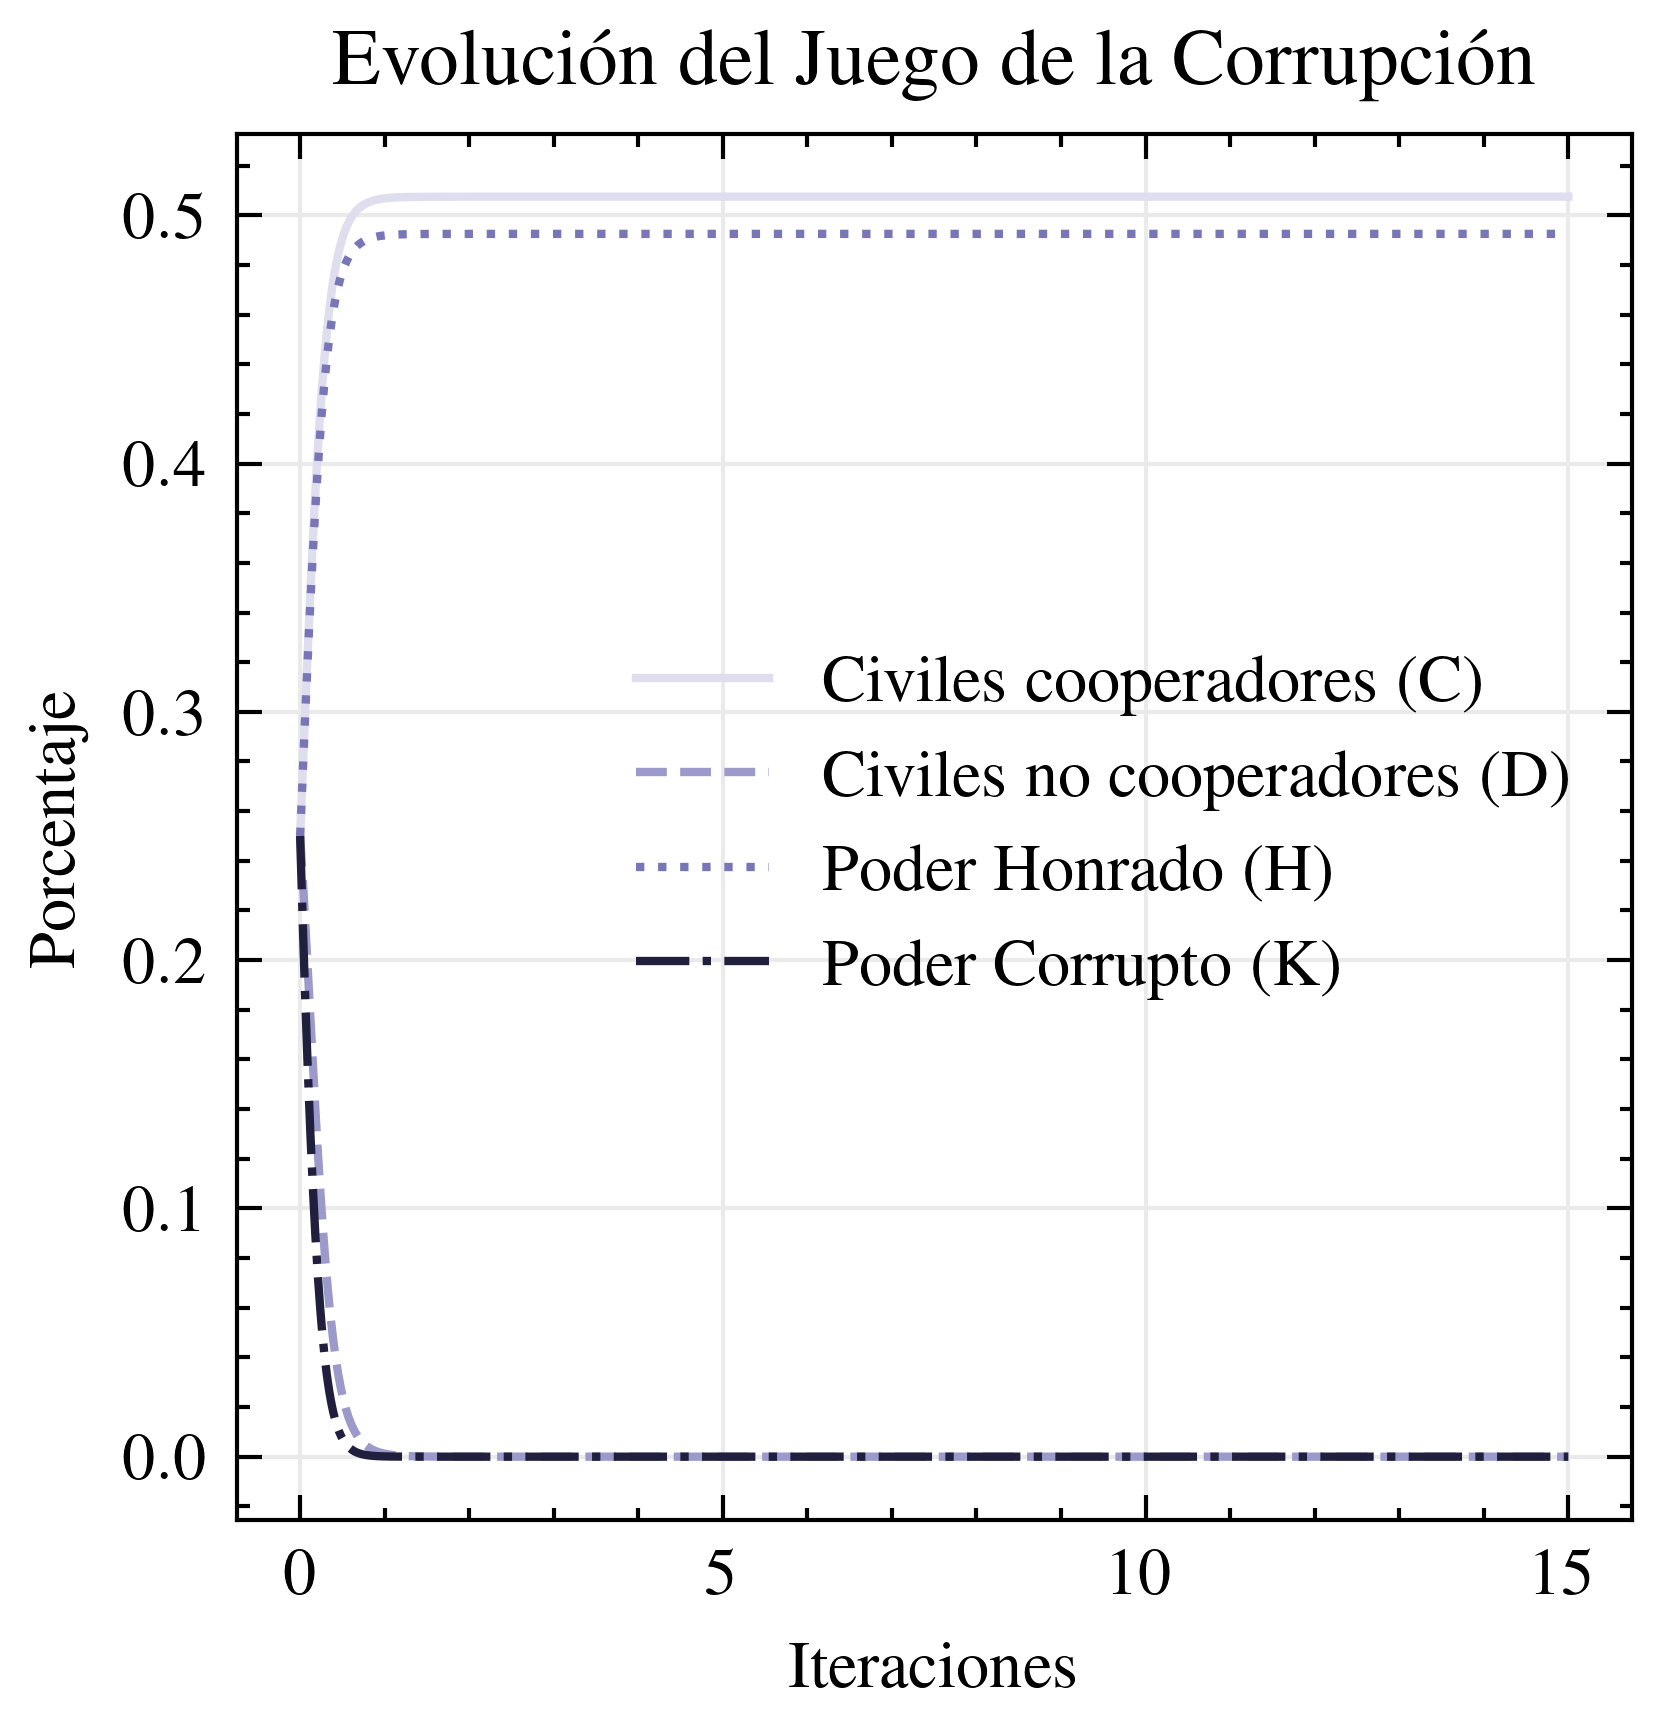

In [8]:
# Parámetros del juego propuesto para Singapur

# Pagos del dilema del prisionero
r = 2 #Recompensa por cooperación mutua (Covivencia de acuerdo al contrato social)
s = 1 #Pérdida por ser cooperador cuando el otro no coopera (que se aprovechen de ti, sufrir una estafa, robo, etc.)
t = 4 #Ganancia por ser no cooperador cuando el otro es cooperador (aprovecharse del otro, estafar, robar, etc.)

p = 10 #Castigo a los civiles (por ejemplo, cárcel por robo)
#Se ajusta el valor de p para que se cumpla la inecuación s < q + d < p 
#Así se promueve una sociedad más cooperativa y menos corrupta (ver la sección de "Discusión" dentro del artículo de Dueñez et al. 2010)
q = 15 #Castigo a las personas con poder (por ejemplo, cárcel por corrupción)
#Se ajusta el valor de q para que sea mayor que p
#Si p > q entonces la corrupción florece (ver la sección de "Discusión" del artículo de Dueñez et al. 2010)

c = 0.2 #Costo por hacer cumplir las leyes, un buen estado de derecho implican bajos costos.
d = 0.2 #Costo por castigar a alguien corrupto (por ejemplo, costo de tiempo y recursos para investigar un caso de corrupción) Una sociedad con bajos índices de corrupcion tendrá costos muy bajos.

tiempo_inicial = 0
tiempo_final = 15
num_puntos = 1000
filename = "Singapur"

# Llama a la función para ejecutar la simulación
run_corruption_simulation(r, s, t, p, q, c, d, tiempo_inicial, tiempo_final, num_puntos, filename)

# Mexico

Corresponde a una sociedad que es propensa a la corrupción, existirá un equilibrio entre civiles no cooperativos y personas corruptas.

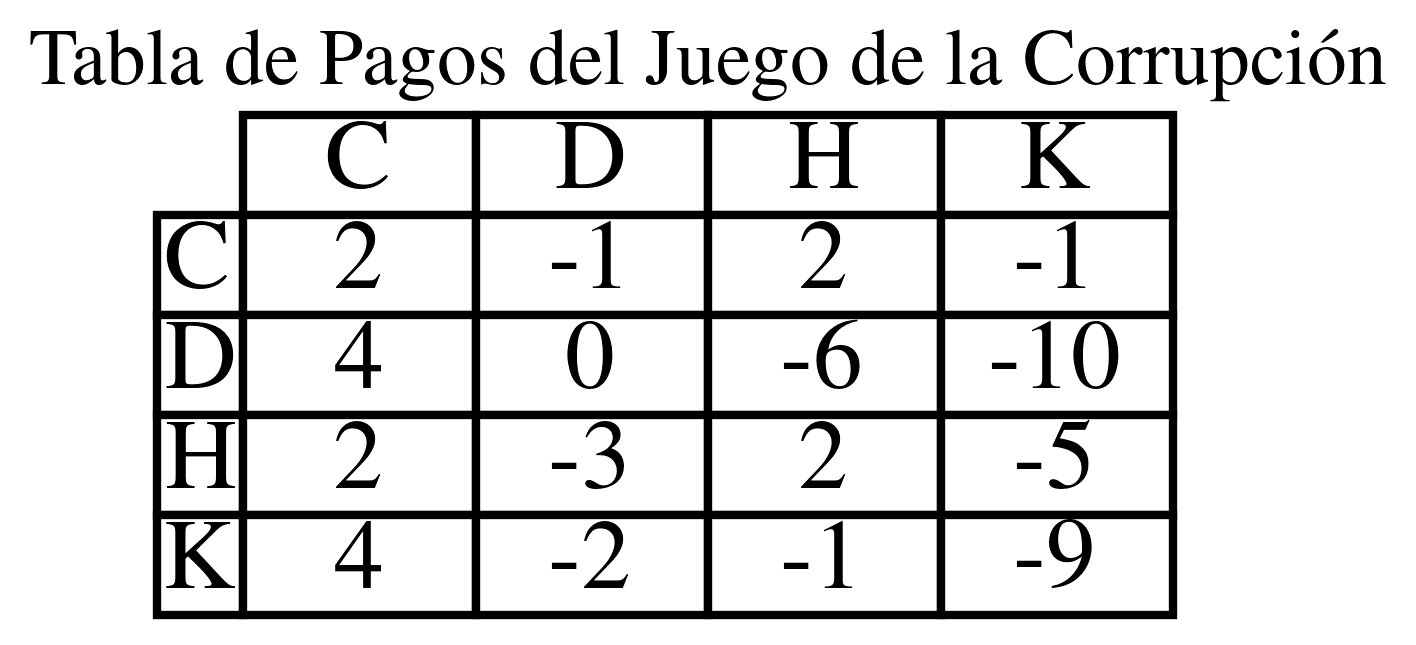


Tabla de Pagos (Valores Numéricos):

    C     D     H     K    
 C     2   -1    2   -1 
 D     4    0   -6  -10 
 H     2   -3    2   -5 
 K     4   -2   -1   -9 




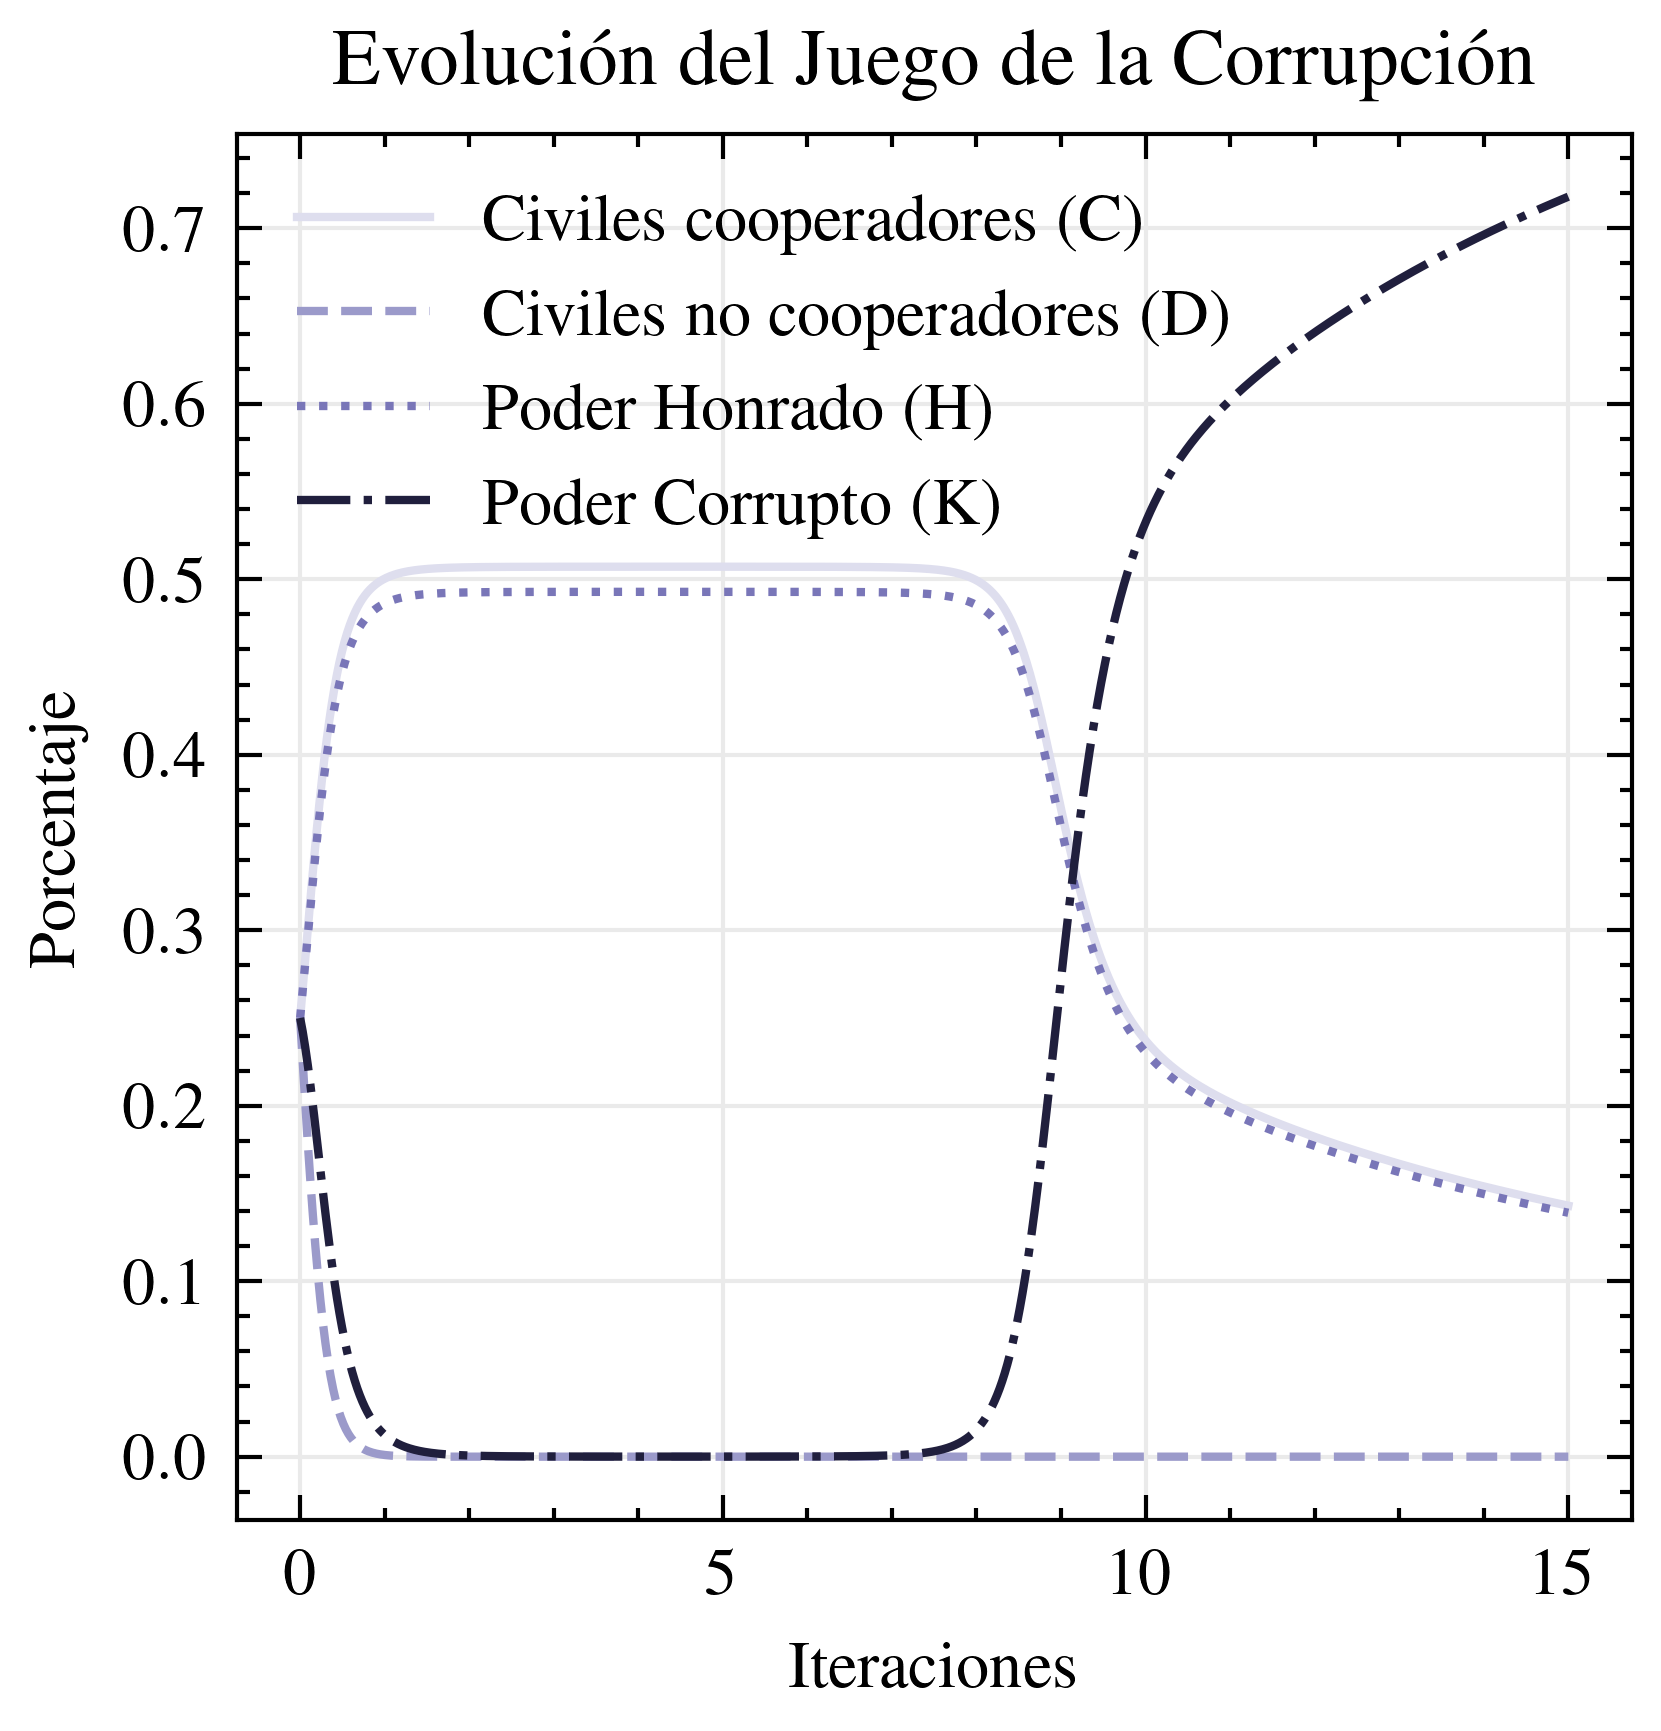

In [9]:
# Parámetros del juego propuesto para México

# Parametros sugeridos para el caso mexicano
# p > q castigo de las personas con poder es menor que para los civiles
# s < q + d < p el equilibrio entre (K) y (C) existe y es estable
# q + d << p 
# 0 < c << 1

# Pagos del dilema del prisionero
r = 2 #Recompensa por cooperación mutua (Covivencia de acuerdo al contrato social)
s = 1 #Pérdida por ser cooperador cuando el otro no coopera (que se aprovechen de ti, sufrir una estafa, robo, etc.)
t = 4 #Ganancia por ser no cooperador cuando el otro es cooperador (aprovecharse del otro, estafar, robar, etc.)

p = 10 #Castigo a los civiles (por ejemplo, cárcel por robo)
#Se ajusta el valor de p para que se cumpla la inecuación s < q + d < p 
#Así se promueve una sociedad más cooperativa y menos corrupta (ver la sección de "Discusión" dentro del artículo de Dueñez et al. 2010)
c = 2 #Costo por hacer cumplir las leyes, un buen estado de derecho implican bajos costos.

q = 5 #Castigo a las personas con poder (por ejemplo, cárcel por corrupción)
#Se ajusta el valor de q para que sea mayor que p
#Si p > q entonces la corrupción florece (ver la sección de "Discusión" del artículo de Dueñez et al. 2010)
d = 4 #Costo por castigar a alguien corrupto (por ejemplo, costo de tiempo y recursos para investigar un caso de corrupción) Una sociedad con bajos índices de corrupcion tendrá costos muy bajos.


tiempo_inicial = 0
tiempo_final = 15
num_puntos = 1000
filename = "México"

# Llama a la función para ejecutar la simulación
run_corruption_simulation(r, s, t, p, q, c, d, tiempo_inicial, tiempo_final, num_puntos, filename)